<a href="https://colab.research.google.com/github/JakeOh/202505_BD50/blob/main/lab_da/ml10_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Decision Tree

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report

# 데이터 셋

wine 데이터셋

In [2]:
wine_csv = 'https://bit.ly/wine_csv_data'

In [3]:
wine_df = pd.read_csv(wine_csv)

In [4]:
wine_df.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


In [5]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [6]:
wine_df.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


In [7]:
class_counts = wine_df['class'].value_counts()

In [8]:
class_counts  #> 0 - red wine, 1 - white wine

,count
class,
1.0,4898
0.0,1599


## alcohol, sugar, pH 변수들의 히스토그램

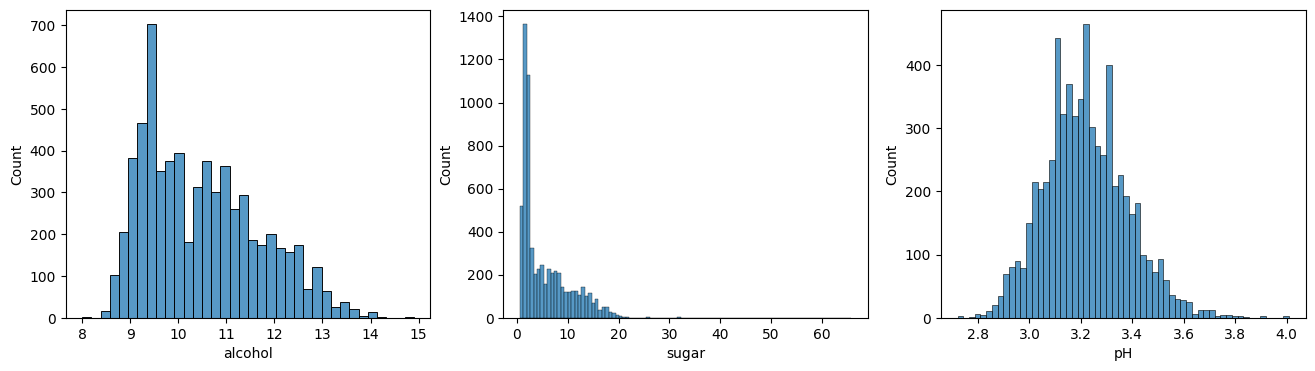

In [9]:
fig, axes = plt.subplots(ncols=3, figsize=(16, 4))

for i, col in enumerate(wine_df.columns[:3]):
    sns.histplot(data=wine_df, x=col, ax=axes[i])

plt.show()

## class 별로 색깔을 다르게 시각화한 pairplot

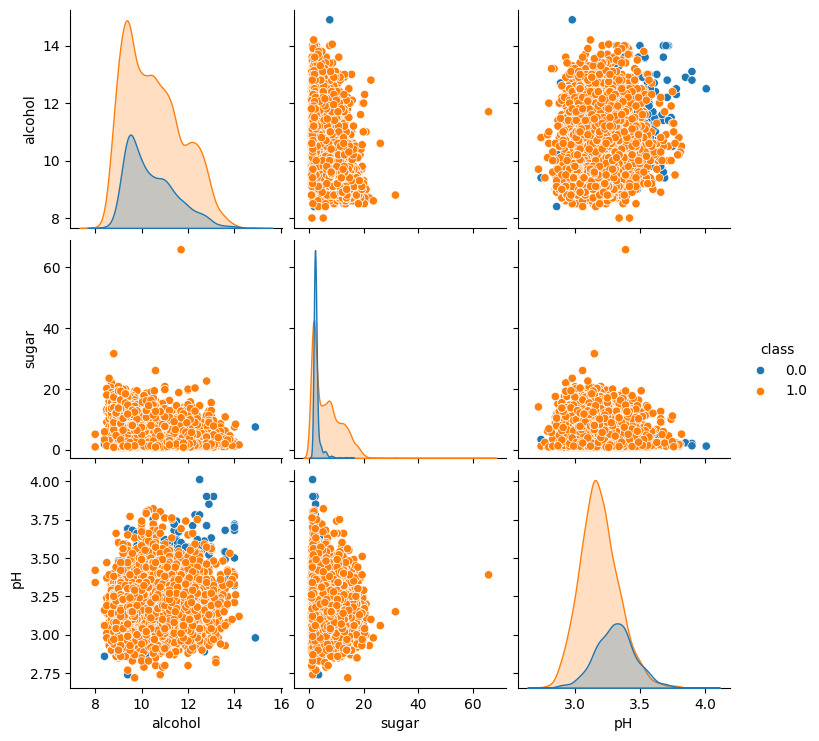

In [10]:
sns.pairplot(data=wine_df, hue='class')
plt.show()

# 훈련/테스트 나누기

In [11]:
X = wine_df[wine_df.columns[:3]].values  # 특성 배열(alcohol, sugar, pH)
y = wine_df['class'].values  # 타겟 배열(class)

In [12]:
X[:5, :]

array([[9.4 , 1.9 , 3.51],
       [9.8 , 2.6 , 3.2 ],
       [9.8 , 2.3 , 3.26],
       [9.8 , 1.9 , 3.16],
       [9.4 , 1.9 , 3.51]])

In [13]:
y[:5]

array([0., 0., 0., 0., 0.])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
X_train.shape

(5197, 3)

In [16]:
X_test.shape

(1300, 3)

In [17]:
y_train.shape

(5197,)

In [18]:
y_test.shape

(1300,)

In [19]:
feature_names = wine_df.columns[:3]  # 특성 이름
target_names = ['red', 'white']  # 클래스 이름(레이블)
print(feature_names)
print(target_names)

Index(['alcohol', 'sugar', 'pH'], dtype='object')
['red', 'white']


# Decision Tree Classifier

In [20]:
tree_clf = DecisionTreeClassifier(random_state=42)  # 모델 생성

In [21]:
tree_clf.fit(X_train, y_train)  # 모델 훈련

DecisionTreeClassifier(random_state=42)

In [22]:
train_pred = tree_clf.predict(X_train)  # 훈련 셋 예측값

In [23]:
cm_train = confusion_matrix(y_train, train_pred)
cm_train

array([[1276,    3],
       [   8, 3910]])

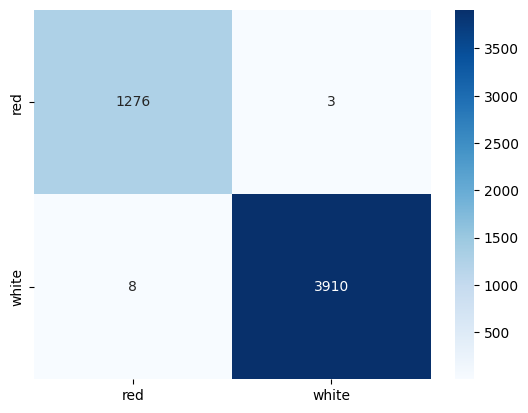

In [24]:
sns.heatmap(data=cm_train, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [25]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1279
         1.0       1.00      1.00      1.00      3918

    accuracy                           1.00      5197
   macro avg       1.00      1.00      1.00      5197
weighted avg       1.00      1.00      1.00      5197



In [26]:
test_pred = tree_clf.predict(X_test)  # 테스트 셋 예측값

In [27]:
cm_test = confusion_matrix(y_test, test_pred)
cm_test

array([[226,  94],
       [ 81, 899]])

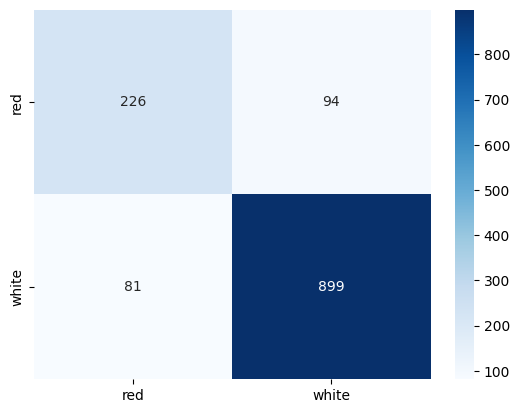

In [28]:
sns.heatmap(data=cm_test, cmap='Blues', annot=True, fmt='d',
            xticklabels=target_names, yticklabels=target_names)
plt.show()

In [29]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

         0.0       0.74      0.71      0.72       320
         1.0       0.91      0.92      0.91       980

    accuracy                           0.87      1300
   macro avg       0.82      0.81      0.82      1300
weighted avg       0.86      0.87      0.86      1300



Decision Tree는 과대적합이 매우 크다.

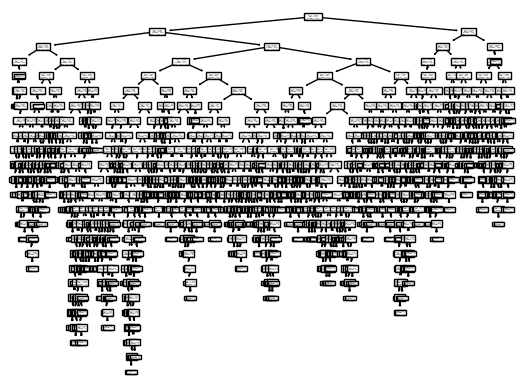

In [30]:
plot_tree(tree_clf)
plt.show()

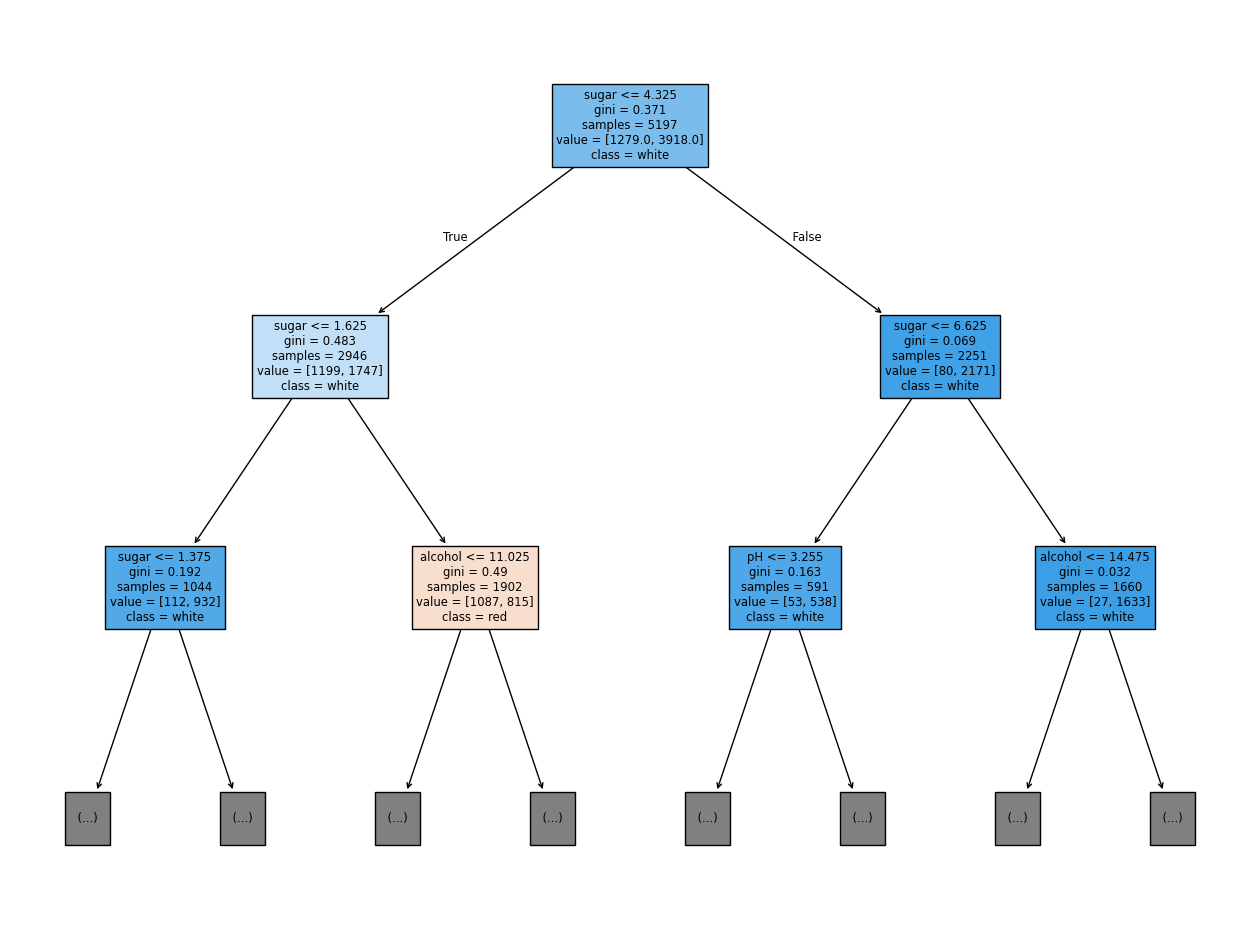

In [31]:
plt.figure(figsize=(16, 12))
plot_tree(tree_clf, max_depth=2, feature_names=feature_names, class_names=target_names,
          filled=True)
plt.show()

## Decision Tree를 나누는 기준

---

__Gini impurity(불순도)__

$$
Gini = 1 - \sum_i p_i^2
$$

*   $p_i$: $i$번째 클래스가 될 확률
*   이진(binary class) 분류
    *   gini = 1 - ((양성 클래스 확률)^2 + (음성 클래스 확률)^2)
    *   양성과 음성의 비율이 1:1인 경우, gini = 1 - (0.5^2 + 0.5^2) = 0.5. 불순도 최대.
    *   양성 또는 음성으로 완벽하게 분류된 경우, gini = 1 - 1 = 0. 불순도 최소.
*   Decision tree는 부모 노드와 자식 노드의 gini 불순도 차이가 가능한 커지도록 가지를 성장시킴.

---

__Entropy(엔트로피)__

$$
Entropy = -\sum_i p_i \log_k (p_i)
$$

*   $k$: 클래스의 개수(이진 분류인 경우, k=2).
*   $p_i$: $i$번째 클래스가 될 확률.
*   이진 분류
    *   양성과 음성의 비율이 1:1인 경우, Entropy = 1. 엔트로피 최대.
    *   양성 또는 음성으로 완벽히 분류된 경우, Entropy = 0. 엔트로피 최소.
*   Decision tree 객체를 생성할 때 criterion='entropy'라고 설정하면, 부모 노드와 자식 노드에서의 엔트로피 차이가 가능하면 커지도록 가지를 생성함.


## Decision Tree 특징

*   장점:
    *   특성들을 스케일링할 필요가 없다.
    *   결과를 이해하기 쉽다.
*   단점:
    *   과적합(overfitting)되기가 쉽다.
    *   여러가지 규제들을 적용해서 과적합 문제를 해결해야 함.
*   규제 하이퍼 파라미터(hyperparameter) - 생성자의 파라미터들
    *   `max_depth`: decision tree의 최대 깊이.
    *   `max_leaf_node`: leaf node의 최댓값.
    *   `max_features`: 각 노드에서 분할에 사용할 특성의 최대 개수.
    *   `min_samples_split`: 노드가 분할되기 위해서 가져야 할 최소 샘플 개수.
    *   `min_samples_leaf`: leaf 노드가 가져야 할 최소 샘플 개수.
    *   `max_`로 시작하는 파라미터의 값을 증가시키면, 트리의 크기가 커짐.
        *   규제가 작아짐.
        *   overfitting이 커짐.
    *   `max_`로 시작하는 파라미터 값을 감소시키면, 트리의 크기가 작아지기 때문에 overfitting이 작아짐.
    *   `min_`으로 시작하는 파라미터 값을 증가시키면, 트리의 크기가 작아짐.
    

## max_depth 파라미터 변화에 따른 정확도

In [32]:
# 최대 깊이가 2인 decision tree
tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)

In [33]:
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

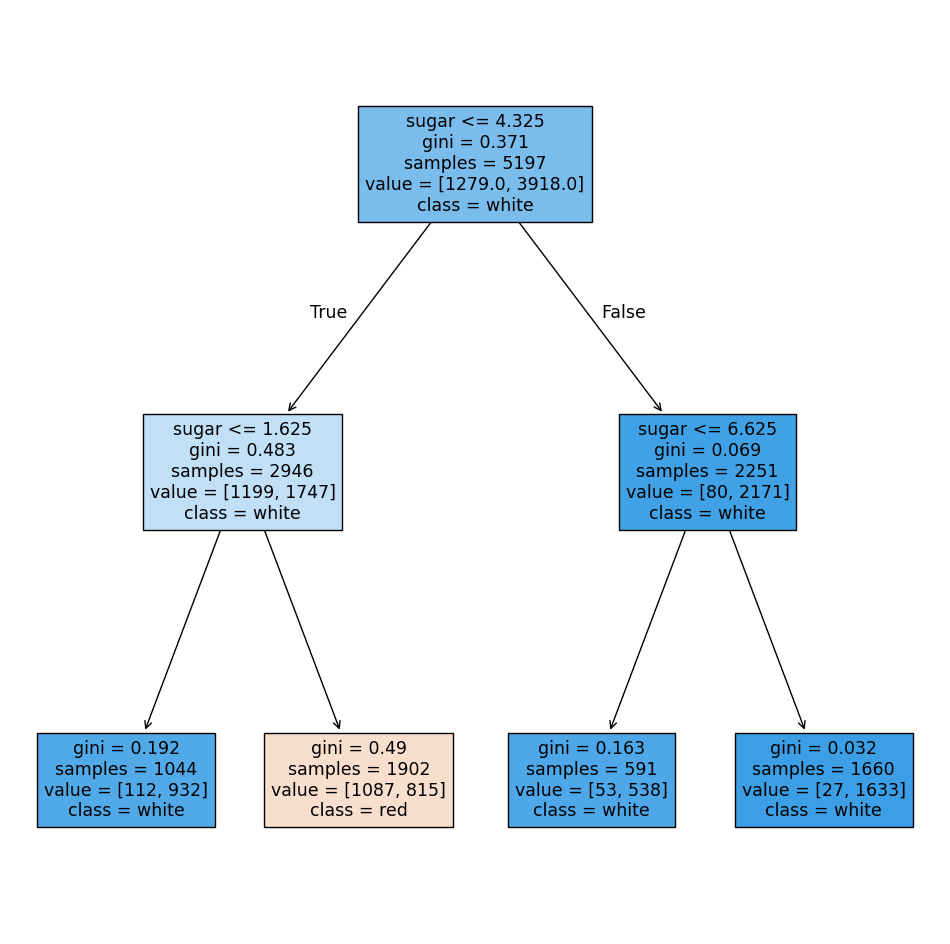

In [34]:
plt.figure(figsize=(12, 12))
plot_tree(tree_clf, filled=True, feature_names=feature_names, class_names=target_names)
plt.show()

In [35]:
print('train acc.:', tree_clf.score(X_train, y_train))
print('test acc.:', tree_clf.score(X_test, y_test))

train acc.: 0.8062343659803733
test acc.: 0.8107692307692308


In [36]:
# 최대 깊이가 5인 decision tree
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

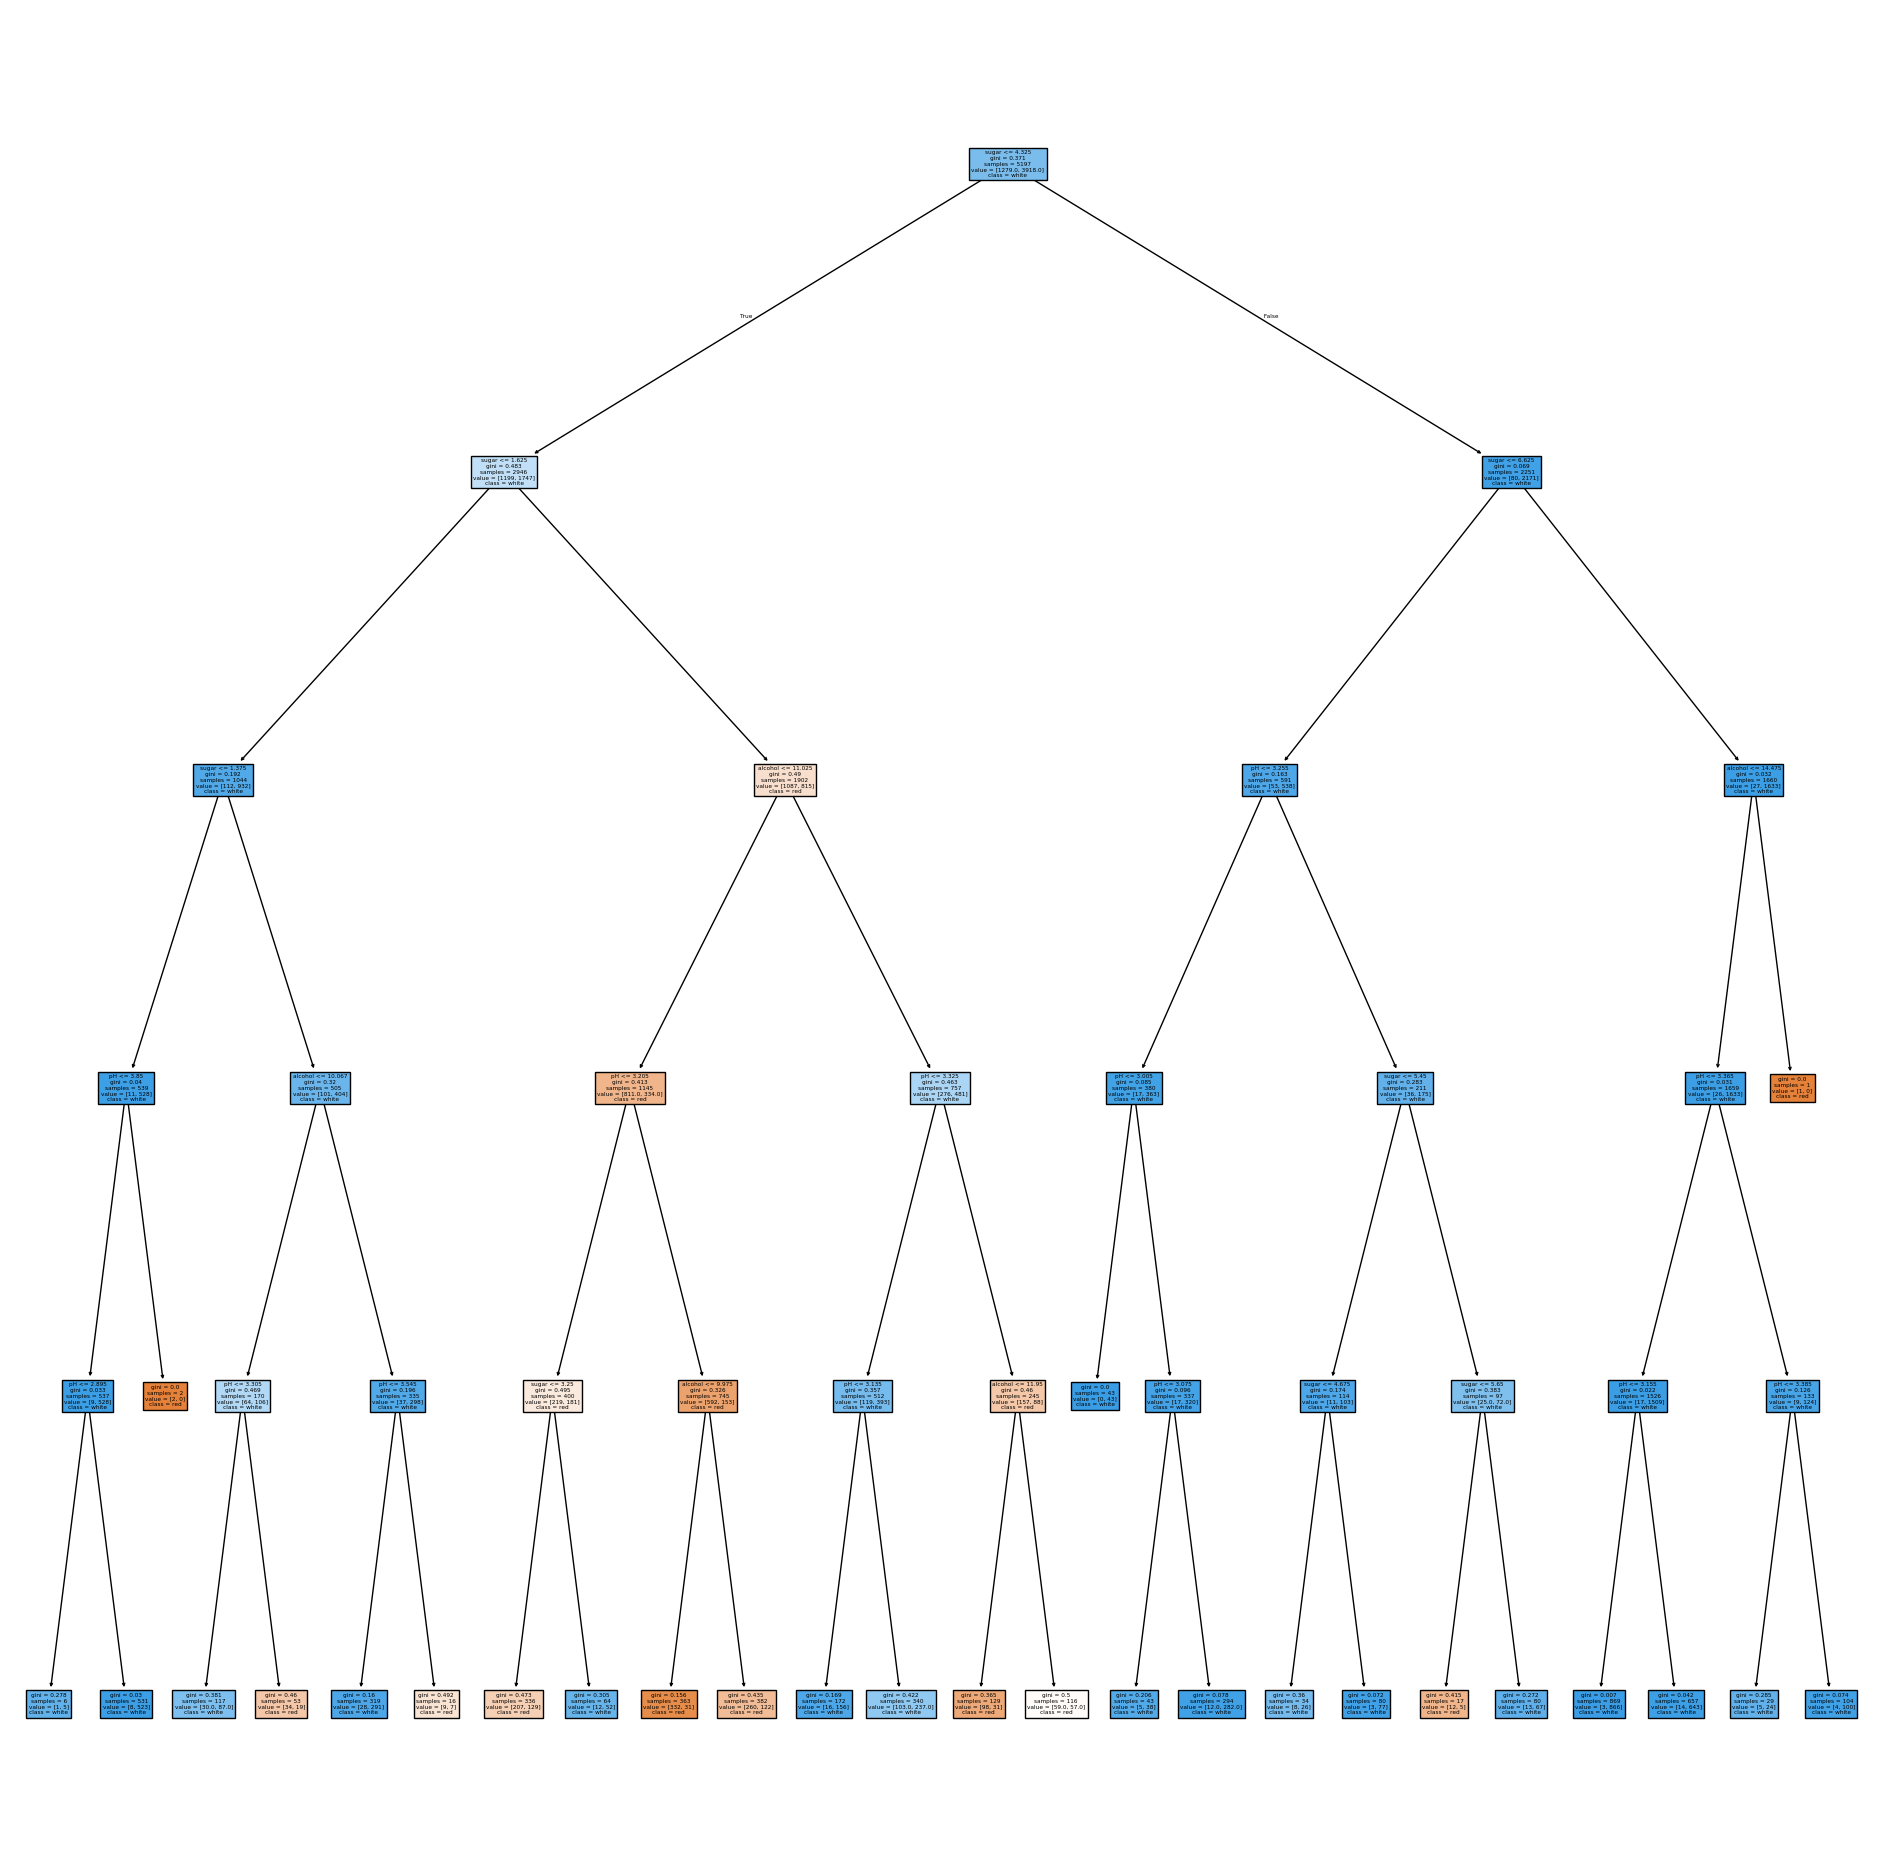

In [37]:
plt.figure(figsize=(24, 24))
plot_tree(tree_clf, feature_names=feature_names, class_names=target_names, filled=True)
plt.show()

In [38]:
print('train acc.:', tree_clf.score(X_train, y_train))
print('test acc.:', tree_clf.score(X_test, y_test))

train acc.: 0.8718491437367712
test acc.: 0.8576923076923076


In [39]:
depths = np.arange(2, 16)  # max_depth: 2 ~ 15
train_scores = []  # 훈련 셋에서의 정확도를 저장할 리스트
test_scores = []  # 테스트 셋에서의 정확도를 저장할 리스트

for d in depths:
    tree_clf = DecisionTreeClassifier(max_depth=d, random_state=42)  # decision tree 생성
    tree_clf.fit(X_train, y_train)  # 훈련
    train_acc = tree_clf.score(X_train, y_train)  # 훈련 셋 정확도
    train_scores.append(train_acc)
    test_acc = tree_clf.score(X_test, y_test)  # 테스트 셋 정확도
    test_scores.append(test_acc)

print(train_scores)
print(test_scores)

[0.8062343659803733, 0.8458726188185491, 0.8595343467385029, 0.8718491437367712, 0.8778141235328074, 0.8880123147969983, 0.9003271117952665, 0.9124494900904367, 0.9255339619010968, 0.941312295555128, 0.9538195112564941, 0.9680584952857417, 0.9757552434096595, 0.9834519915335771]
[0.8107692307692308, 0.8407692307692308, 0.8523076923076923, 0.8576923076923076, 0.8484615384615385, 0.8515384615384616, 0.8584615384615385, 0.8615384615384616, 0.8615384615384616, 0.8584615384615385, 0.8646153846153846, 0.8623076923076923, 0.8661538461538462, 0.8676923076923077]


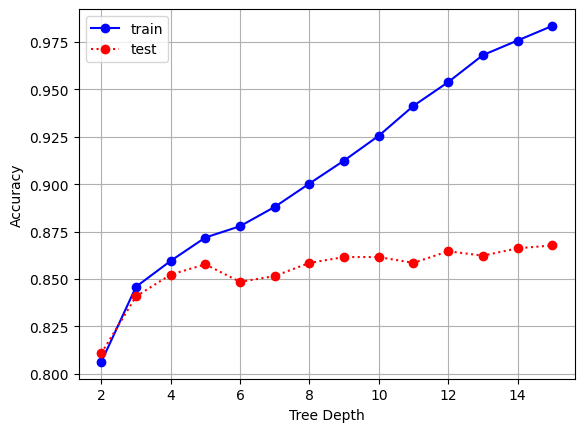

In [40]:
plt.plot(depths, train_scores, 'bo-', label='train')
plt.plot(depths, test_scores, 'ro:', label='test')
plt.legend()
plt.grid()
plt.xlabel('Tree Depth')
plt.ylabel('Accuracy')
plt.show()

# 하이퍼 파라미터 튜닝

*   전체 데이터를 훈련(train)-검증(validation)-테스트(test) 셋으로 나눔.
*   하이퍼 파라미터를 변경하면서 훈련 셋으로 ML 모델을 훈련시킴.
*   하이퍼 파라미터 설정에 따른 성능 테스트는 검증 셋으로 수행.
    *   검증 셋에서 점수가 좋은 (그리고 과대적합이 적은) 하이퍼 파라미터를 선택.
*   튜닝이 끝난 모델의 일반화 성능을 예측하기 위해서 테스트 셋을 사용.

In [41]:
# 전체 데이터셋을 훈련/테스트 셋으로 나누기
X_tr_full, X_test, y_tr_full, y_test = train_test_split(X, y,
                                                        test_size=0.2,
                                                        random_state=42,
                                                        stratify=y)

In [42]:
# X_tr_full을 훈련/검증 셋으로 나누기.
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_full, y_tr_full,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_tr_full)

In [43]:
depths = np.arange(2, 16)
train_scores = []
val_scores = []
for d in depths:
    tree_clf = DecisionTreeClassifier(max_depth=d, random_state=42)
    tree_clf.fit(X_tr, y_tr)
    train_scores.append(tree_clf.score(X_tr, y_tr))
    val_scores.append(tree_clf.score(X_val, y_val))

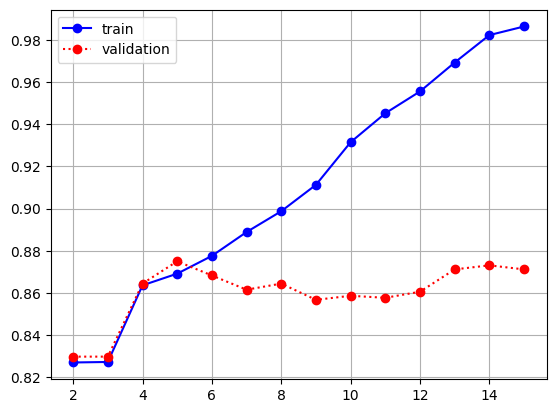

In [44]:
plt.plot(depths, train_scores, 'bo-', label='train')
plt.plot(depths, val_scores, 'ro:', label='validation')
plt.legend()
plt.grid()
plt.show()

In [45]:
train_scores[4], val_scores[4]  # max_depth=6일 때 훈련 셋 정확도, 검증 셋 정확도

(0.8775559297570363, 0.8682692307692308)

## min_samples_split 하이퍼 파라미터 튜닝

In [46]:
min_samples = [0.01, 0.05, 0.1, 0.15, 0.2]
train_scores = []
val_scores = []
for s in min_samples:
    # min_samples_split=0.01: node를 나누기 위한 기준 - 훈련 셋의 1%
    tree_clf = DecisionTreeClassifier(min_samples_split=s, random_state=42)
    tree_clf.fit(X_tr, y_tr)
    train_scores.append(tree_clf.score(X_tr, y_tr))
    val_scores.append(tree_clf.score(X_val, y_val))

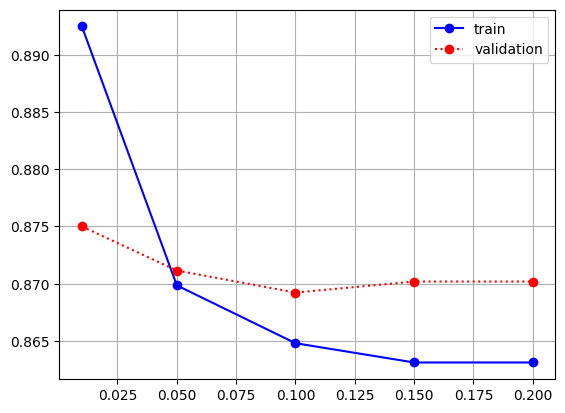

In [47]:
plt.plot(min_samples, train_scores, 'bo-', label='train')
plt.plot(min_samples, val_scores, 'ro:', label='validation')
plt.legend()
plt.grid()
plt.show()

# 교차 검증(Cross Validation)

In [48]:
from sklearn.model_selection import cross_validate, cross_val_score

In [49]:
X_tr_full.shape

(5197, 3)

In [50]:
y_tr_full.shape

(5197,)

In [51]:
# 교차 검증에서 사용할 예측기(ML 모델) 생성
clf = DecisionTreeClassifier(max_depth=6, random_state=42)

# 5-fold 교차 검증(cross validation): 전체 훈련 셋을 5개로 나눠서 그 중 한 개를 검증으로 사용.
# 파라미터 cv: n-fold 교차 검증
# 파라미터 n_jobs: 동시에(병렬로) 수행할 작업 개수. -1이면 CPU의 모든 코어를 사용.
# 파라미터 return_train_score: 훈련 점수를 리턴할 것인 지.
cv = cross_validate(estimator=clf, X=X_tr_full, y=y_tr_full,
                    cv=5, n_jobs=-1, return_train_score=True)

In [52]:
cv  #> cross_validatate() 함수의 리턴 값은 dict 객체

{'fit_time': array([0.00872445, 0.00861645, 0.00786662, 0.00773597, 0.00741315]),
 'score_time': array([0.00169468, 0.00176144, 0.00159764, 0.00143433, 0.00130057]),
 'test_score': array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273]),
 'train_score': array([0.87466923, 0.8811643 , 0.88455988, 0.88095238, 0.88648389])}

In [53]:
np.mean(cv['train_score'])  # 각 교차검증에서 훈련 셋 정확도들의 평균
#> 교차검증 훈련 셋 점수 평균은 일반적인 훈련 셋 점수와 비슷하거나 약간 좋음.

np.float64(0.8815659371589127)

In [54]:
np.mean(cv['test_score'])  # 각 교차검증에서 검증 셋 정확도들의 평균

np.float64(0.8620333900940252)

In [55]:
# n-fold 교차검증에서 각각의 검증 셋에서의 점수(정확도)들
cross_val_score(estimator=clf, X=X_tr_full, y=y_tr_full, cv=5, n_jobs=-1)

array([0.87019231, 0.86634615, 0.84889317, 0.86429259, 0.86044273])

## 교차 검증을 사용한 max_depth 하이퍼 파라미터 튜닝

In [56]:
train_scores = []
val_scores = []
max_depths = np.arange(2, 16)
for d in max_depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=42)
    cv = cross_validate(estimator=tree, X=X_tr_full, y=y_tr_full,
                        cv=5, n_jobs=-1, return_train_score=True)
    train_acc = np.mean(cv['train_score'])
    train_scores.append(train_acc)
    test_acc = np.mean(cv['test_score'])
    val_scores.append(test_acc)

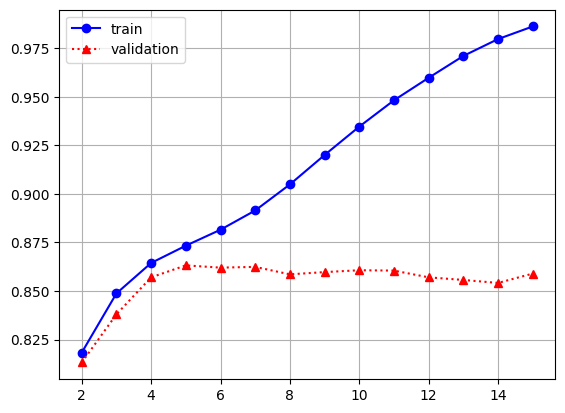

In [57]:
plt.plot(max_depths, train_scores, 'bo-', label='train')
plt.plot(max_depths, val_scores, 'r^:', label='validation')
plt.legend()
plt.grid()
plt.show()

In [58]:
np.max(val_scores)

np.float64(0.8631863108018065)

In [59]:
np.argmax(val_scores)

np.int64(3)

In [60]:
max_depths[np.argmax(val_scores)]

np.int64(5)

# Grid Search Cross Validation

In [61]:
from sklearn.model_selection import GridSearchCV

In [62]:
# 파라미터 튜닝을 하려는 ML 모델(예측기) 생성
tree = DecisionTreeClassifier(random_state=42)

In [63]:
# 튜닝할 하이퍼 파라미터들의 조합을 dict로 만듦. 키는 ML 클래스 생성자의 파라미터 이름을 사용.
params = {'max_depth': np.arange(2, 21),
          'min_samples_split': np.arange(2, 100, 2)}

In [64]:
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(estimator=tree, param_grid=params, n_jobs=-1)

In [65]:
# 훈련 -> 5-fold 교차 검증 수행하면서 최적의 파라미터 조합을 찾음.
grid_cv.fit(X_tr_full, y_tr_full)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20]),
                         'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34,
       36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68,
       70, 72, 74, 76, 78, 80, 82, 84, 86, 88, 90, 92, 94, 96, 98])})

In [66]:
grid_cv.best_params_  # 교차 검증의 test_score를 최대로 만들어 주는 파라미터 조합

{'max_depth': np.int64(7), 'min_samples_split': np.int64(84)}

In [67]:
grid_cv.best_score_  # 교차 검증에서 test_score 최댓값.

np.float64(0.867805767379877)

In [68]:
best_tree = grid_cv.best_estimator_
best_tree

DecisionTreeClassifier(max_depth=np.int64(7), min_samples_split=np.int64(84),
                       random_state=42)

In [69]:
best_tree.score(X_test, y_test)

0.8476923076923077

# Random Search Cross Validation

*   Grid Search 교차검증은 파라미터들의 조합을 직접 (dict 타입으로) 만들어서 교차검증을 수행.
*   Random Search 교차검증
    *   파라미터들의 조합을 난수로 샘플링할 수 있도록 확률 분포 객체를 만듦.
    *   교차검증을 수행하는 객체가 파라미터들을 특정 확률 분포를 따르는 난수로 생성해서 교차검증을 수행.
    *   scipy 패키지의 확률분포 함수들을 이용.

In [70]:
import scipy

In [71]:
int_gen = scipy.stats.randint(0, 10)  # [0, 10) 범위의 정수를 균등 분포로 만들어 주는 객체.
int_gen

In [72]:
numbers = int_gen.rvs(100)  # 난수 발생기로 난수를 100개 생성
numbers

array([6, 3, 9, 0, 3, 6, 0, 5, 2, 1, 8, 8, 6, 4, 1, 5, 3, 1, 0, 3, 8, 1,
       2, 3, 9, 8, 1, 6, 2, 3, 0, 5, 3, 3, 7, 7, 2, 6, 9, 8, 0, 1, 8, 2,
       5, 6, 3, 5, 9, 8, 4, 2, 5, 8, 7, 9, 6, 0, 3, 5, 4, 7, 3, 1, 1, 9,
       7, 2, 2, 4, 7, 1, 8, 6, 7, 7, 5, 4, 0, 3, 0, 5, 5, 8, 3, 6, 8, 1,
       2, 8, 4, 6, 9, 6, 5, 3, 8, 2, 9, 1])

In [73]:
np.unique(numbers, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 8, 11, 10, 14,  6, 11, 11,  8, 13,  8]))

In [74]:
num_gen = scipy.stats.uniform(0, 1)  # [0, 1) 범위의 실수들을 동일한 확률로 생성해 주는 객체.
num_gen

In [75]:
numbers = num_gen.rvs(10)
numbers

array([0.7501558 , 0.22650357, 0.34989932, 0.78231514, 0.11356059,
       0.3619014 , 0.87948848, 0.27961183, 0.25408325, 0.61000071])

In [76]:
from sklearn.model_selection import RandomizedSearchCV

In [82]:
# random search cv에서 사용할 파라미터 조합 - 난수 확률 분포.
params = {'max_depth': scipy.stats.randint(2, 100),
          'min_samples_split': scipy.stats.randint(2, 500),
          'min_samples_leaf': scipy.stats.randint(2, 50),
          'min_impurity_decrease': scipy.stats.uniform(0.0001, 0.001)}

In [83]:
tree = DecisionTreeClassifier(random_state=42)

In [84]:
rand_cv = RandomizedSearchCV(estimator=tree,
                             param_distributions=params,  # 파라미터들의 확률 분포
                             n_iter=100,  # 파라미터들의 조합 갯수
                             n_jobs=-1,
                             random_state=42)

In [85]:
rand_cv.fit(X_tr_full, y_tr_full)  # 교차검증으로 최적의 파라미터 조합을 찾음.

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78193f82a6d0>,
                                        'min_impurity_decrease': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x78193f82ad10>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78193f82b290>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x78193f82a150>},
                   random_state=42)

In [86]:
rand_cv.best_params_

{'max_depth': 37,
 'min_impurity_decrease': np.float64(0.00028223608778806236),
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [87]:
rand_cv.best_score_

np.float64(0.8662656400384986)

# Decision Tree Regressor

결정 나무 알고리즘을 사용한 회귀 모델(숫자 예측).

In [88]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

## 데이터셋 준비

In [89]:
fish_csv = 'https://github.com/JakeOh/202505_BD50/raw/refs/heads/main/datasets/fish.csv'

In [90]:
fish_df = pd.read_csv(fish_csv)

In [91]:
fish_df.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


농어(Perch)의 무게를 다른 특성들(Length, Diagonal, Height, Width)로 예측.

In [92]:
perch = fish_df[fish_df.Species == 'Perch']

In [93]:
X = perch.iloc[:, 2:].values  # 특성 배열
y = perch.Weight.values  # 타겟 배열

In [94]:
# 훈련 셋/테스트 셋 나누기
X_tr_full, X_te, y_tr_full, y_te = train_test_split(X, y, test_size=0.25, random_state=42)

In [95]:
X_tr_full.shape

(42, 4)

In [96]:
X_te.shape

(14, 4)

In [98]:
# 훈련 셋을 훈련 셋/검증 셋으로 나누기
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_full, y_tr_full,
                                            test_size=0.25, random_state=42)

In [99]:
X_tr.shape

(31, 4)

In [101]:
X_val.shape

(11, 4)

## Decision Tree 훈련

In [103]:
# Decision Tree 객체 생성
tree_reg = DecisionTreeRegressor(random_state=42)

In [104]:
tree_reg.fit(X_tr, y_tr)

DecisionTreeRegressor(random_state=42)

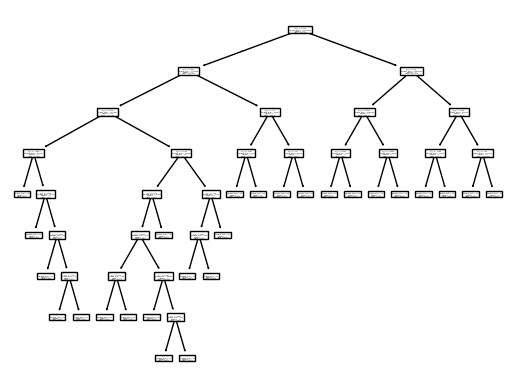

In [105]:
plot_tree(tree_reg)
plt.show()

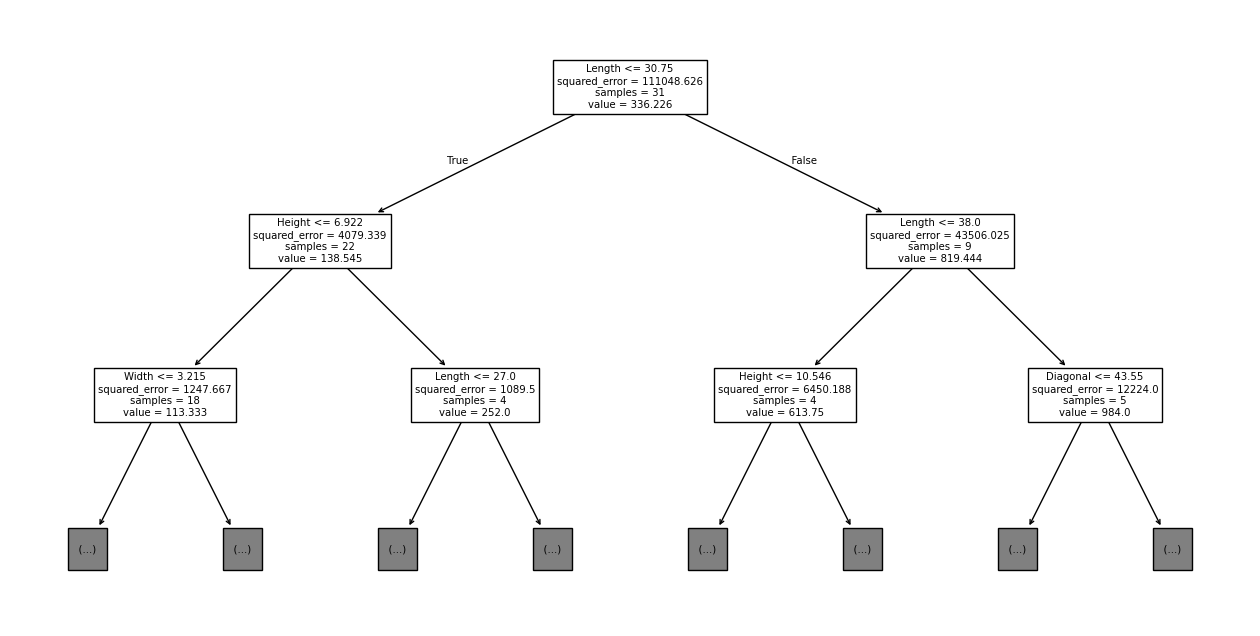

In [117]:
plt.figure(figsize=(16, 8))
plot_tree(tree_reg, max_depth=2, feature_names=perch.columns[2:])
plt.show()

In [119]:
np.mean(y_tr)  # 각 노드의 value는 그 노드에 포함된 샘플의 평균.

np.float64(336.2258064516129)

In [120]:
print('train score:', tree_reg.score(X_tr, y_tr))
print('validation score:', tree_reg.score(X_val, y_val))

train score: 1.0
validation score: 0.8891424473845655


Decision Tree는 과대적합이 심함.

## cross_validate() 함수를 사용해서 최적의 max_depth를 찾아보세요.

In [121]:
depths = np.arange(2, 10)  # Decision Tree에서 테스트할 max_depth들
train_scores = []  # 교차 검증에서 계산된 훈련 셋 점수(들의 평균)을 저장
val_scores = []  # 교차 검증에서 계산된 테스트 셋 점수(들의 평균)을 저장
for d in depths:
    reg = DecisionTreeRegressor(max_depth=d, random_state=42)
    cv = cross_validate(estimator=reg, X=X_tr_full, y=y_tr_full,
                        cv=5, n_jobs=-1, return_train_score=True)
    train_scores.append(np.mean(cv['train_score']))
    val_scores.append(np.mean(cv['test_score']))

print(train_scores)
print(val_scores)

[np.float64(0.9685903554980261), np.float64(0.9934290771426412), np.float64(0.998899697772964), np.float64(0.9998826458263576), np.float64(0.9999698194541387), np.float64(0.99999878447581), np.float64(1.0), np.float64(1.0)]
[np.float64(0.9177278634402615), np.float64(0.9531203941305982), np.float64(0.9434072226786077), np.float64(0.923513957039156), np.float64(0.9655899177591556), np.float64(0.9397846070006051), np.float64(0.9070082050390672), np.float64(0.9070082050390672)]


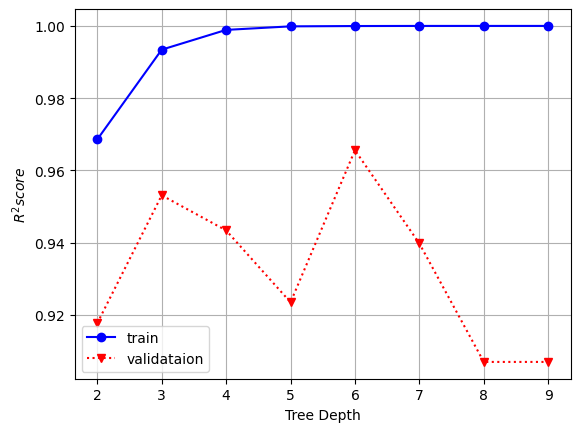

In [128]:
plt.plot(depths, train_scores, 'bo-', label='train')
plt.plot(depths, val_scores, 'rv:', label='validataion')
plt.legend()
plt.grid()
plt.xlabel('Tree Depth')
plt.ylabel('$R^2 score$')
plt.show()

In [123]:
best_score_index = np.argmax(val_scores)  # val_scores에서 최댓값의 인덱스
depths[best_score_index]  # val_scores가 최대인 max_depth.

np.int64(6)

## GridSearchCV 클래스를 사용해서 최적의 max_depth를 찾아보세요.

In [124]:
grid_cv = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                       param_grid={'max_depth': np.arange(2, 10)},
                       cv=5, n_jobs=-1)

In [125]:
grid_cv.fit(X_tr_full, y_tr_full)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [126]:
grid_cv.best_params_

{'max_depth': np.int64(6)}

In [127]:
grid_cv.best_score_

np.float64(0.9655899177591556)

# Pipeline과 GridSearchCV

*   PolynomialFeatures, StandardScaler, LinearRegression/ElasticNet을 Pipeline으로 연결
*   GridSearchCV를 사용해서 하이퍼 파라미터들을 튜닝
    *   PolynomialFeatures: degree
    *   ElansticNet: 규제의 크기

In [129]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, ElasticNet

## LinearRegression

In [135]:
# 교차 검증에서 사용할 ML 모델
model = Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                        ('scaler', StandardScaler()),
                        ('reg', LinearRegression())])

In [136]:
# ML 모델의 파라미터 조합
# param의 키 이름: step_name__param_name
params = {'poly__degree': np.arange(1, 50)}

In [137]:
# GridSearchCV 객체 생성
grid_cv = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1)

In [138]:
grid_cv.fit(X_tr_full, y_tr_full)

GridSearchCV(estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('reg', LinearRegression())]),
             n_jobs=-1,
             param_grid={'poly__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [139]:
grid_cv.best_params_

{'poly__degree': np.int64(2)}

In [140]:
grid_cv.best_score_

np.float64(0.9313419567902532)

## ElasticNet

In [143]:
model = Pipeline(steps=[('poly', PolynomialFeatures(include_bias=False)),
                        ('scaler', StandardScaler()),
                        ('reg', ElasticNet(random_state=42))])

In [144]:
params = {'poly__degree': np.arange(1, 11),
          'reg__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
          'reg__l1_ratio': np.arange(0.1, 1.0, 0.1)}

In [145]:
grid_cv = GridSearchCV(estimator=model, param_grid=params, n_jobs=-1)

In [146]:
grid_cv.fit(X_tr_full, y_tr_full)

GridSearchCV(estimator=Pipeline(steps=[('poly',
                                        PolynomialFeatures(include_bias=False)),
                                       ('scaler', StandardScaler()),
                                       ('reg', ElasticNet(random_state=42))]),
             n_jobs=-1,
             param_grid={'poly__degree': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
                         'reg__alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'reg__l1_ratio': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

In [147]:
grid_cv.best_params_

{'poly__degree': np.int64(4),
 'reg__alpha': 1,
 'reg__l1_ratio': np.float64(0.1)}

In [148]:
grid_cv.best_score_

np.float64(0.984473398224462)